# Background and Tools
There are two algorithms with similar names, which makes them prone to confusion although they have different purposes and follow different learning paradigms. One is in fact a clustering algorithm, k-Means, which in an unsupervised manner finds k clusters in a data set. This is done by iteratively setting out / moving k cluster centers and grouping the points in the set closest into the cluster, while at the same time optimising the separation between the groups (clusters) of data points. The other is a classifier, k-NN, which in its basic conceptual form does not actually do anything to fit a model to the given data, it simply finds the k nearest neighbours in the entire data set to an unseen data point, given some distance measure, and assigns it the class of the majority of the k samples. In actual implementations, other techniques are used to structure the data somewhat, so that the search for the closest points only has to be carried out in a part of the data set. However, it can be called supervised, as it is given the class labels of the data points it works with to do this pre-processing.

You will in this assignment work with a simplified version of the MNIST handwritten numbers dataset provided by SciKitLearn (sklearn.datasets.digits) and inspect and modify it with UMAP, calculate the cosine similarity of each data sample against the means over the different classes, and later both cluster it with k-Means as well as use the k-NN classifier on it, to then run different evaluation tools. The idea is to have used UMAP (as one example of a tool for dimensionality reduction), done a matrix multiplication in Python / Numpy, understand the different elements of the SciKitLearn confusion matrix and evaluation reports, as well as to see what you can do to evaluate a clustering approach (which is not as naturally done as for a classification, where an answer is either wrong or correct). 

# Exercise 1: Getting started


### Exercise 1.1
Make sure to have all the necessary basic tools running with the ["Lab 0: Python intro"](https://canvas.education.lu.se/courses/32297/pages/lab-0-python-intro) exercise. If not already included in your setup, install UMAP (e.g. with ```pip install umap-learn```, see https://umap-learn.readthedocs.io/en/latest/basic_usage.html for some hints).

In [ ]:
# Install with pip install scikit-learn pandas seaborn umap-learn IProgress
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets, metrics
from collections import Counter # For majority counting, but is not strictly necessary
import matplotlib.pyplot as plt 
import numpy as np

import seaborn as sns
import pandas as pd
import umap

### Exercise 1.2
Load the digits dataset from the datasets provided in SciKitLearn. [The python tutorial by Dennis Medved](Python_introduction.ipynb) can provide you with code snippets and inspiration to this and later parts of the assignment.

Inspect the data, plot some sample images (use matplotlib) and be prepared to answer questions about the dataset.

In [1]:
# *****************
# *** Your code ***
# *****************


### Exercise 1.3
Create and train (fit) a UMAP-reducer, then transform and visualise your data, e.g. doing something like:


/Users/maj/repos/lab_solutions_2024/lab1/.venv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


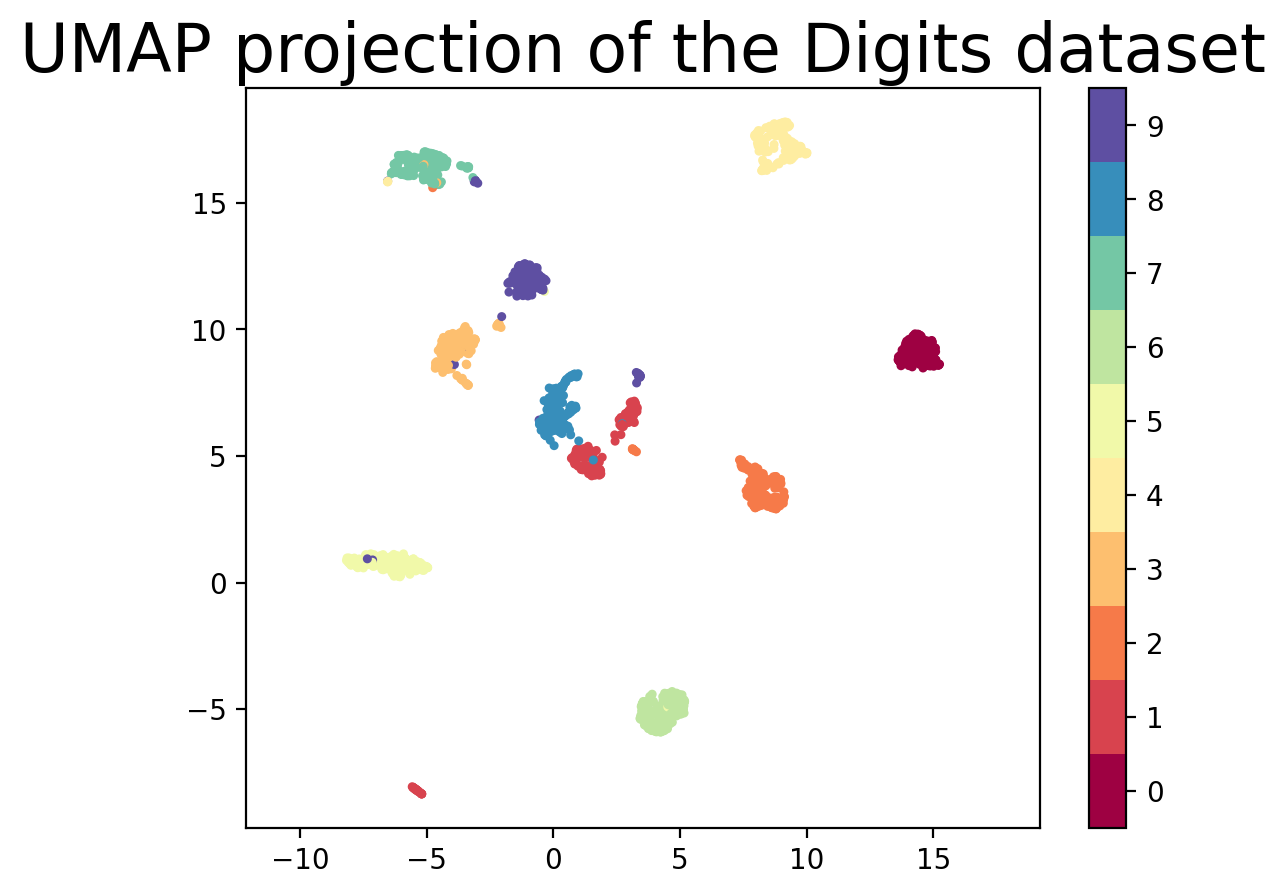

In [ ]:
########### Example code ###########
reducer = umap.UMAP(random_state=42)
reducer.fit(digits.data)
embedding = reducer.transform(digits.data)

plt.scatter(embedding[:, 0], embedding[:, 1], c=digits.target, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP projection of the Digits dataset', fontsize=24);



__Be prepared to explain, at least on a conceptual level, what it does__

# Exercise 2
Calculate the cosine-similarity (should be explained in lecture 2) of each sample against the means of the classes in the data set as following:

### Exercise 2.1
Calculate the "mean image" per class, ```mean_images``` 

In [ ]:
# *****************
# *** Your code ***
# *****************

### Exercise 2.2
Calculate the row-wise L2-norm for the raw data, i.e. the L2-norm over each image (check for example Numpy's linalg.norm for that) __and__ for the mean images you got from step the previous step.

In [ ]:
# *****************
# *** Your code ***
# *****************



(10, 64)

### Exercise 2.3
Calculate the cosine similarity matrix, ```similarities``` of the normalised raw data and mean image matrices. See https://en.wikipedia.org/wiki/Cosine_similarity. as a reminder. 

In [ ]:
# *****************
# *** Your code ***
# *****************


(1797, 10)

### Exercise 2.4
Plot the closest and "furthest" sample (images) for each class, i.e. where cosine similarity is highest / lowest together with the respective mean image. You can use the following plot routine as inspiration to get the images out with some meta data (```similarities``` is the matrix with all the cosine similarities):

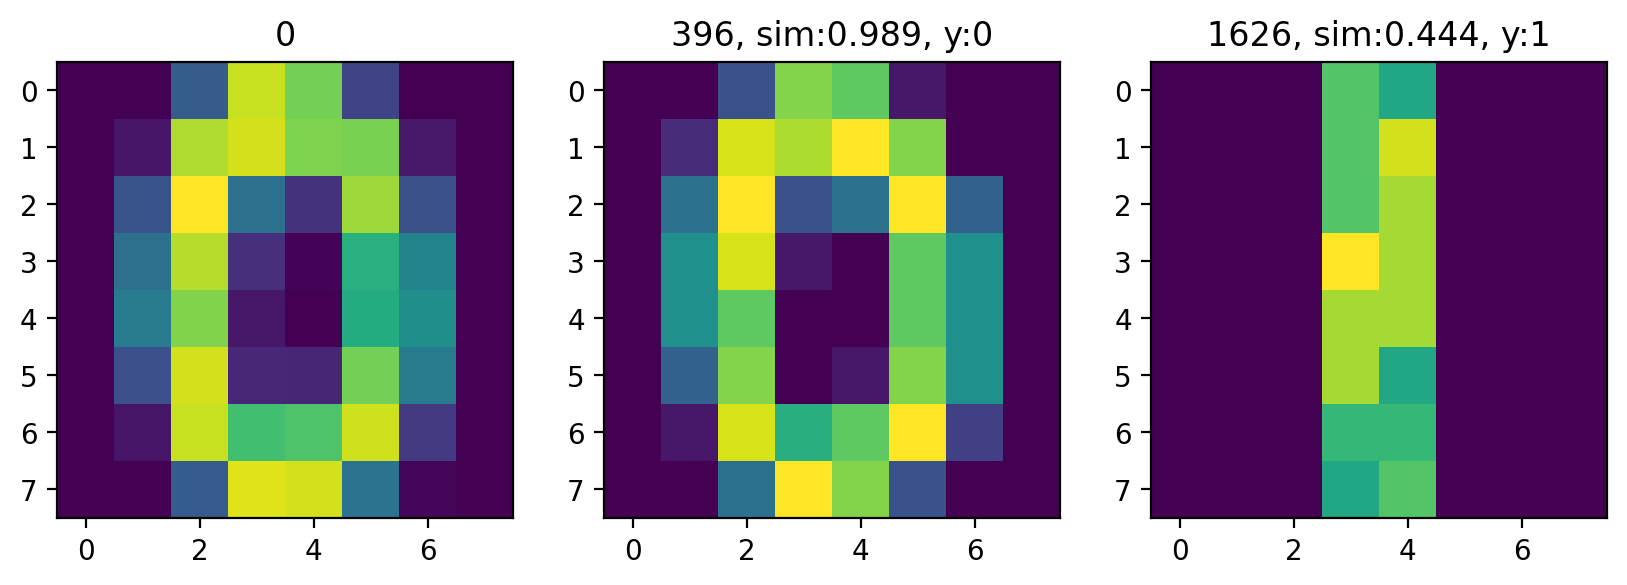

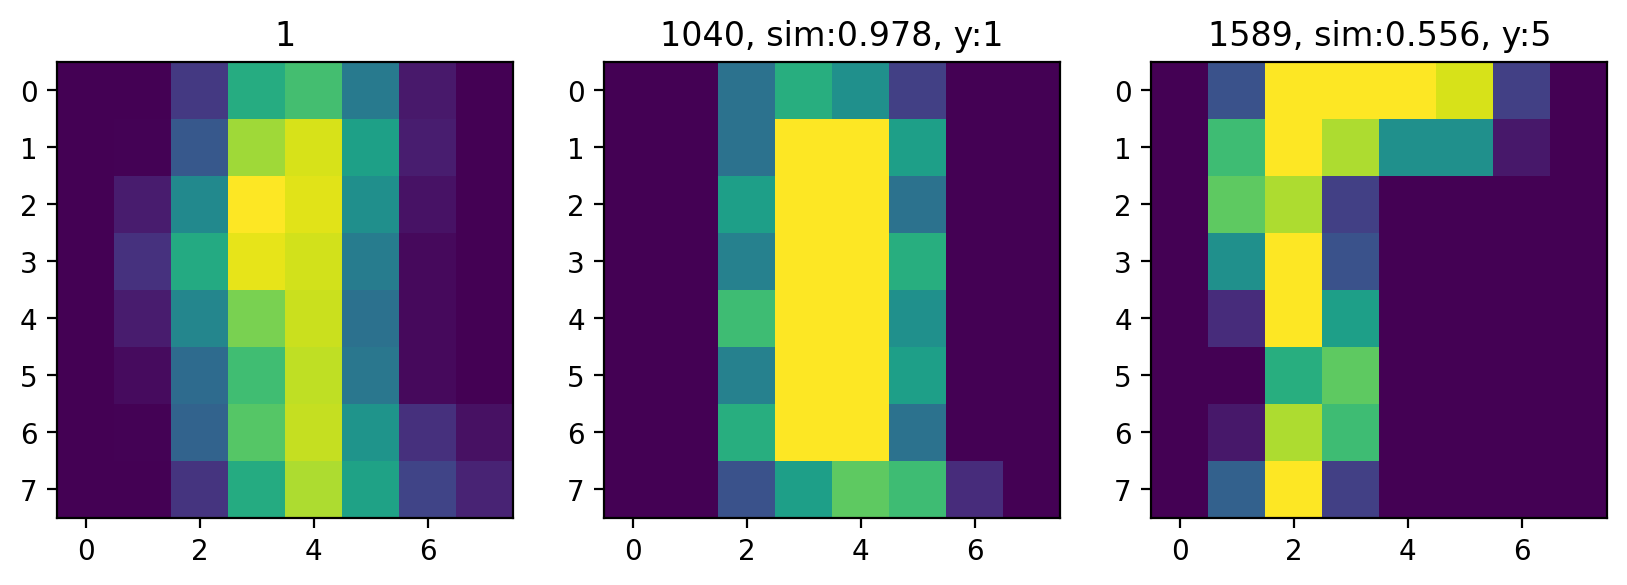

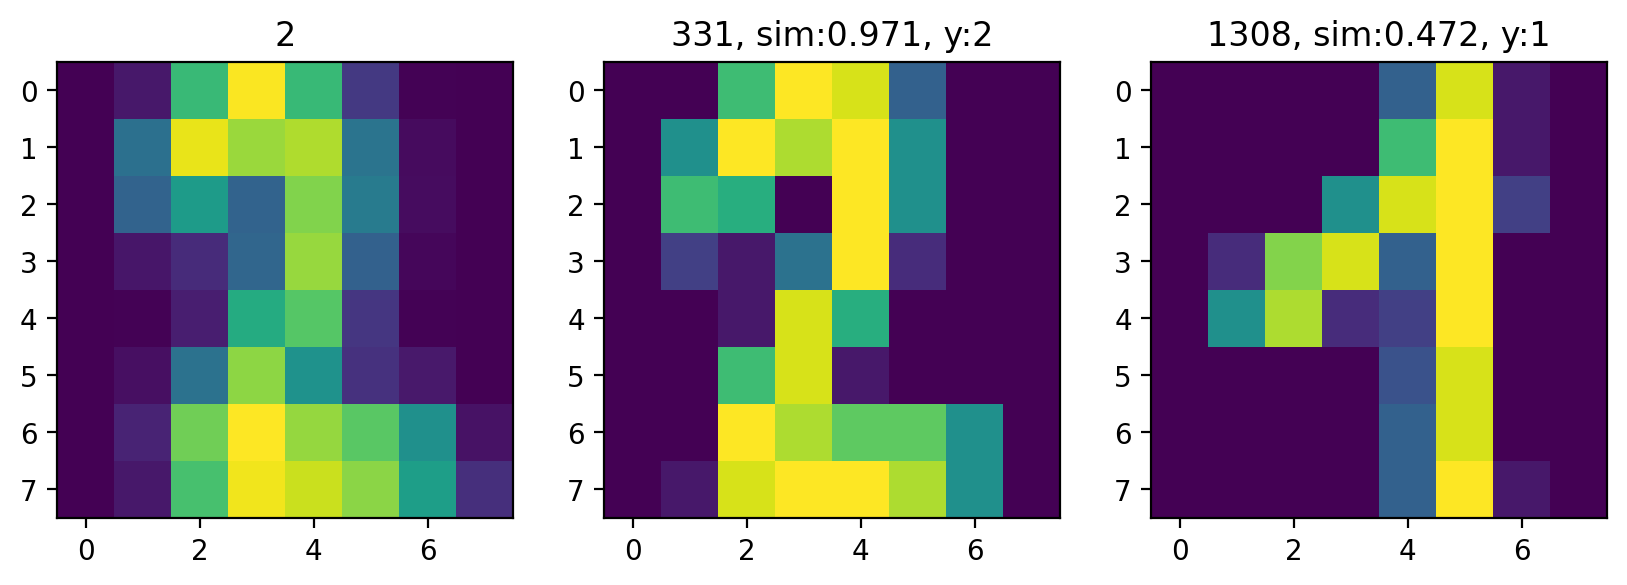

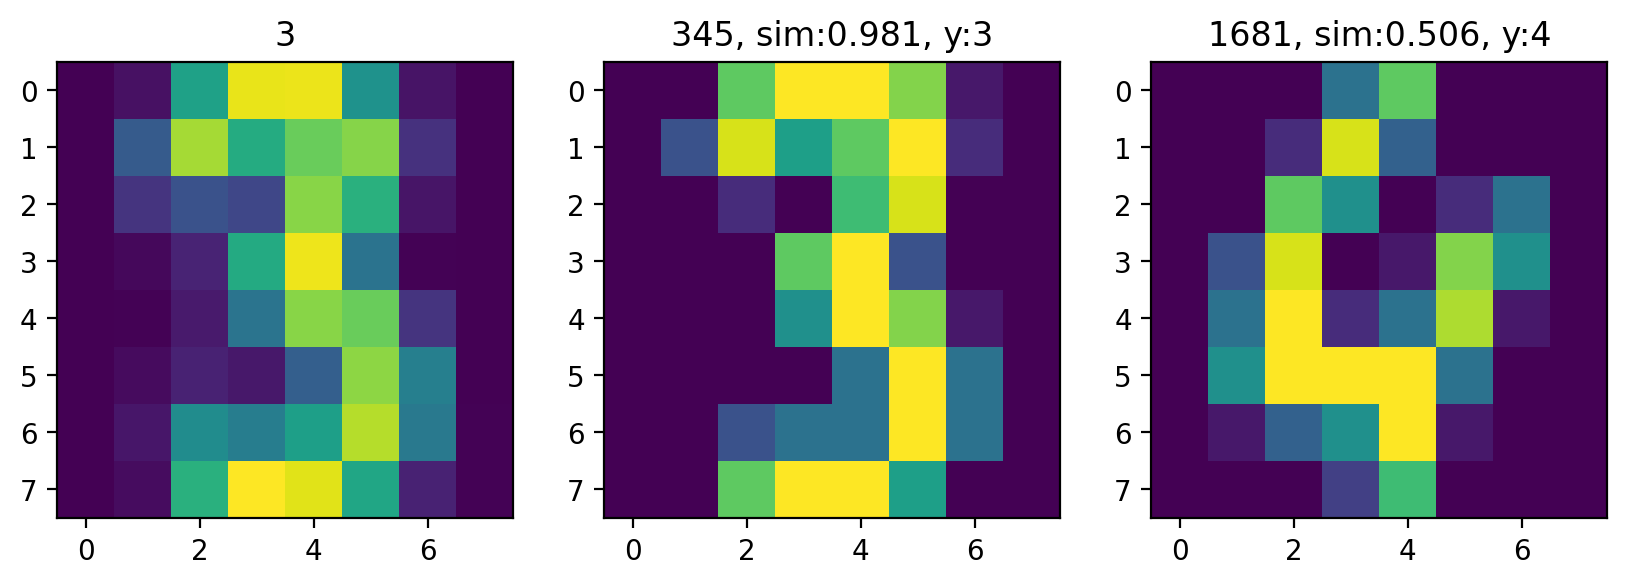

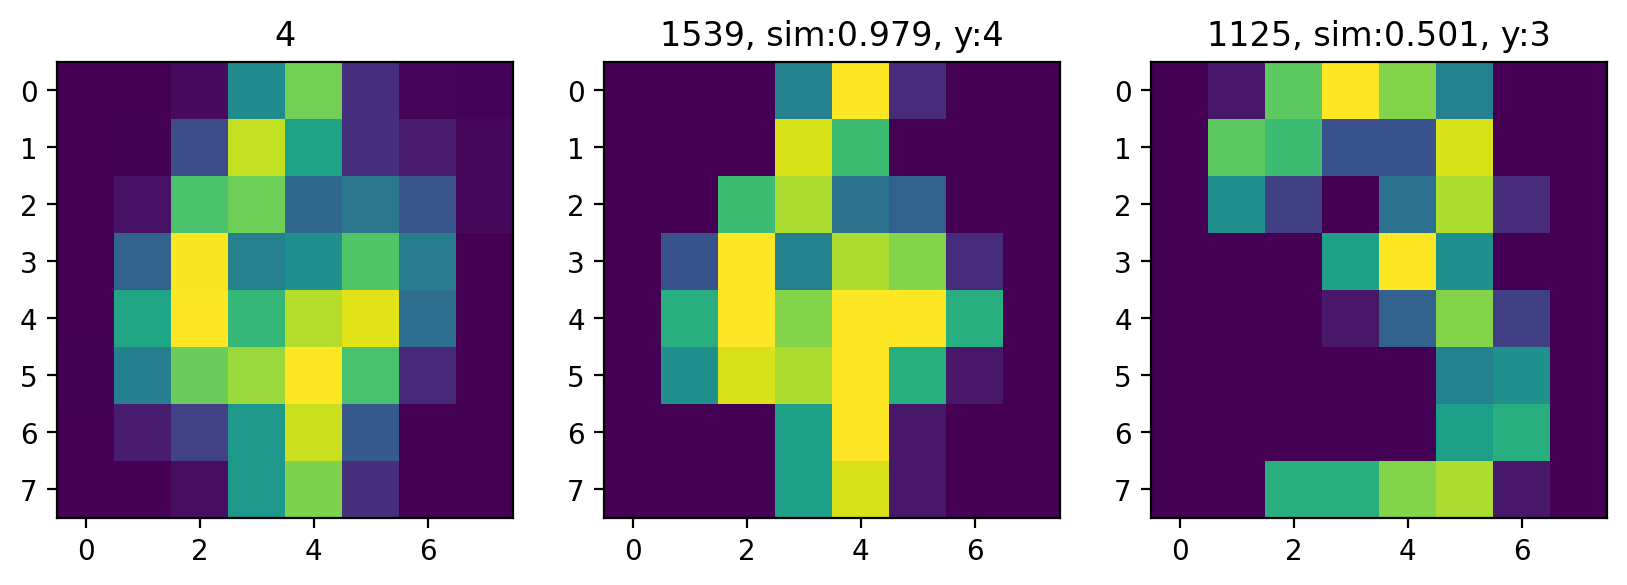

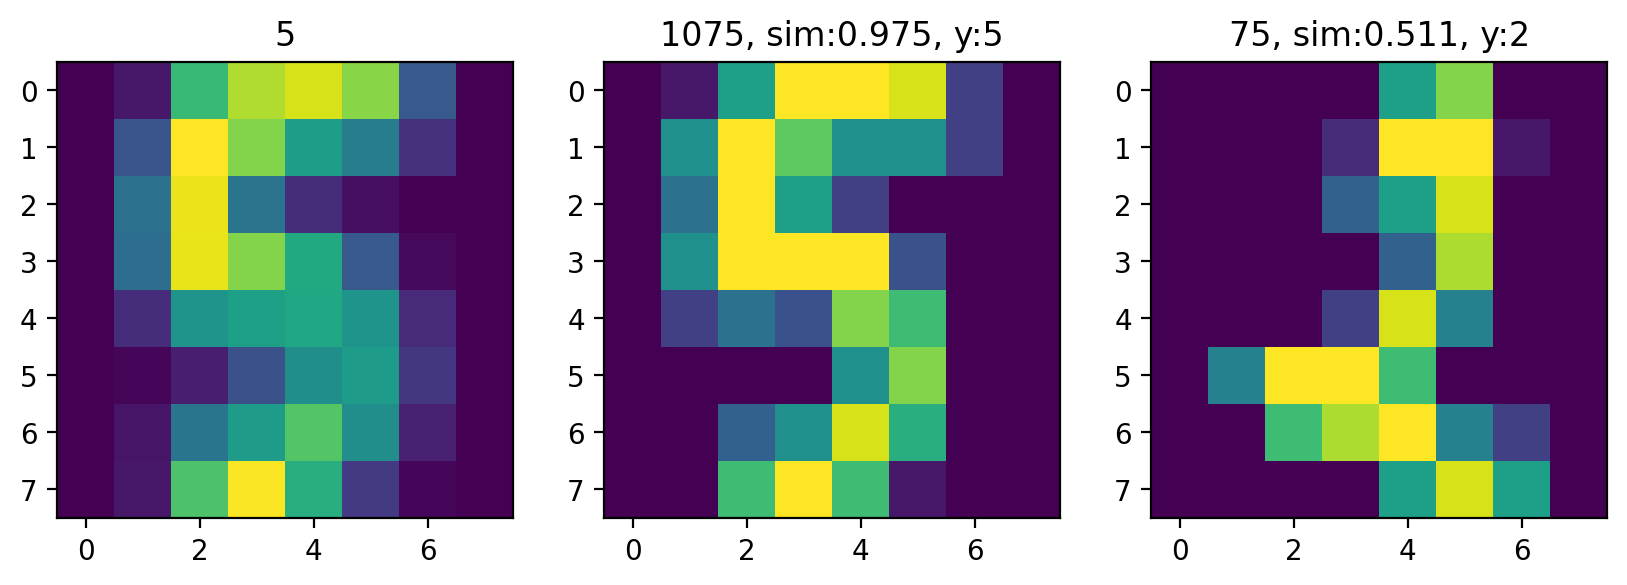

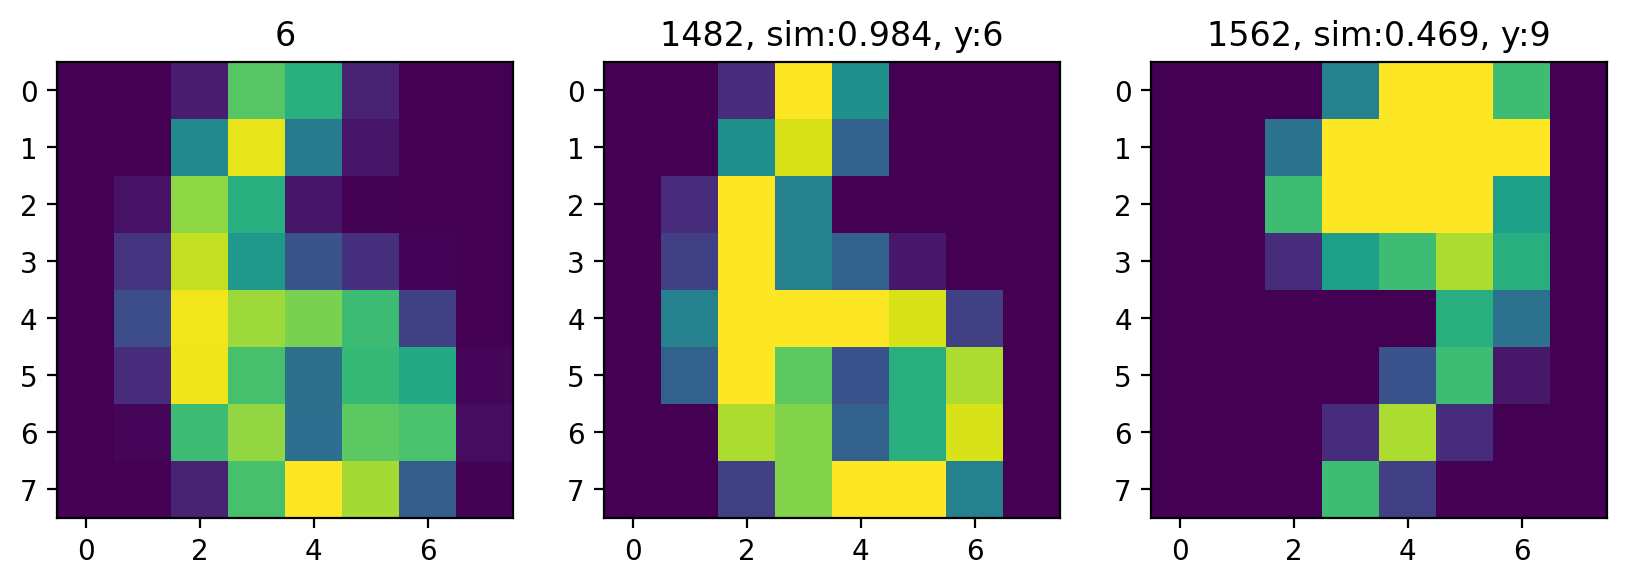

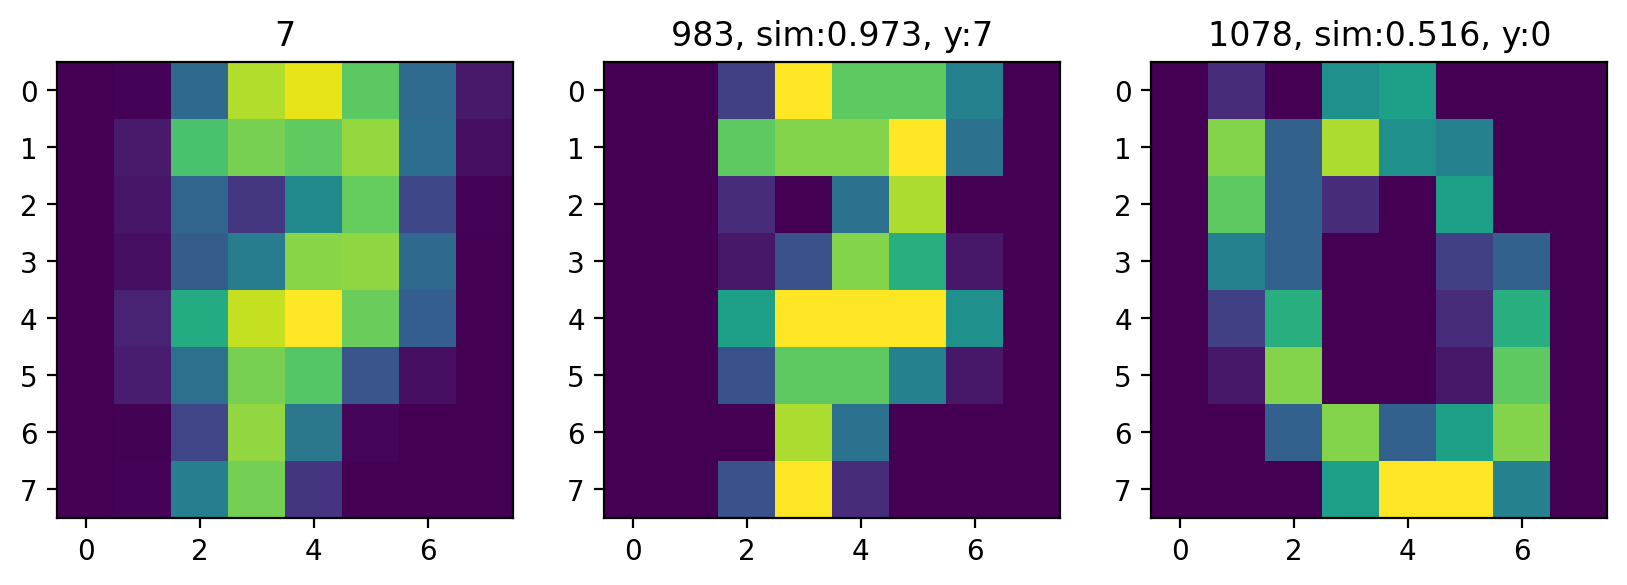

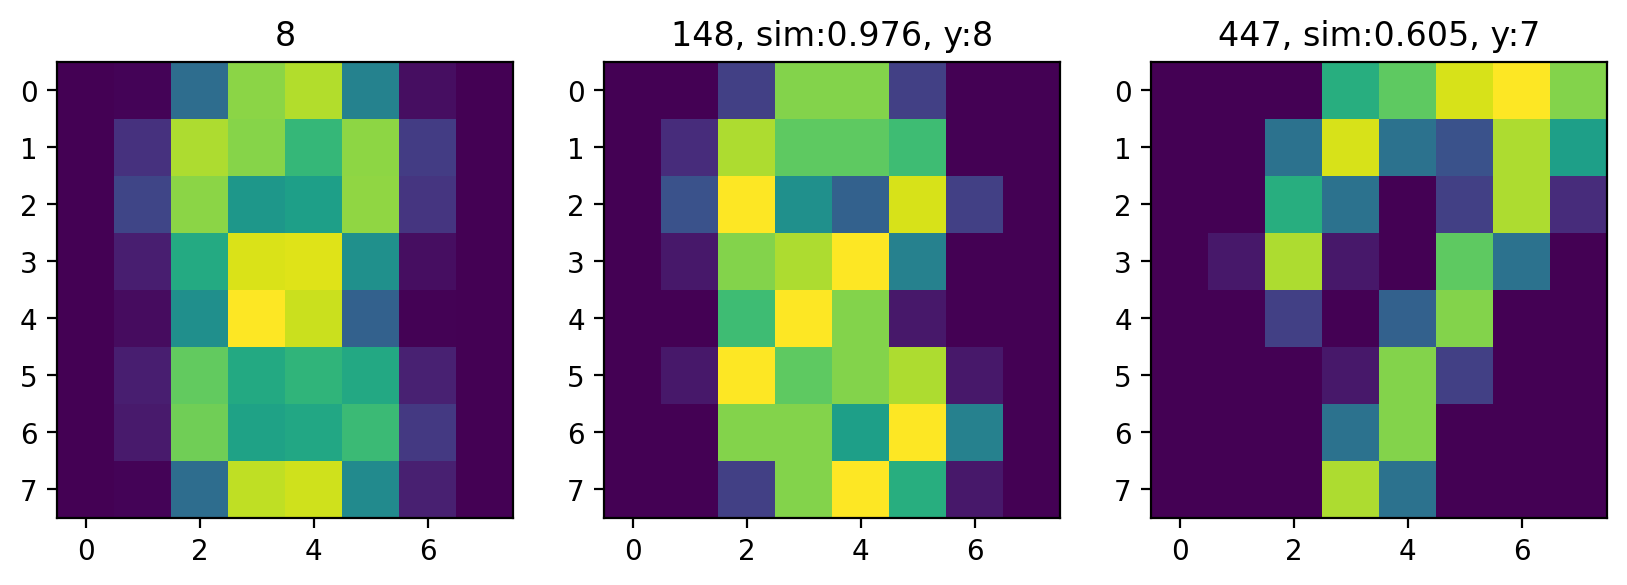

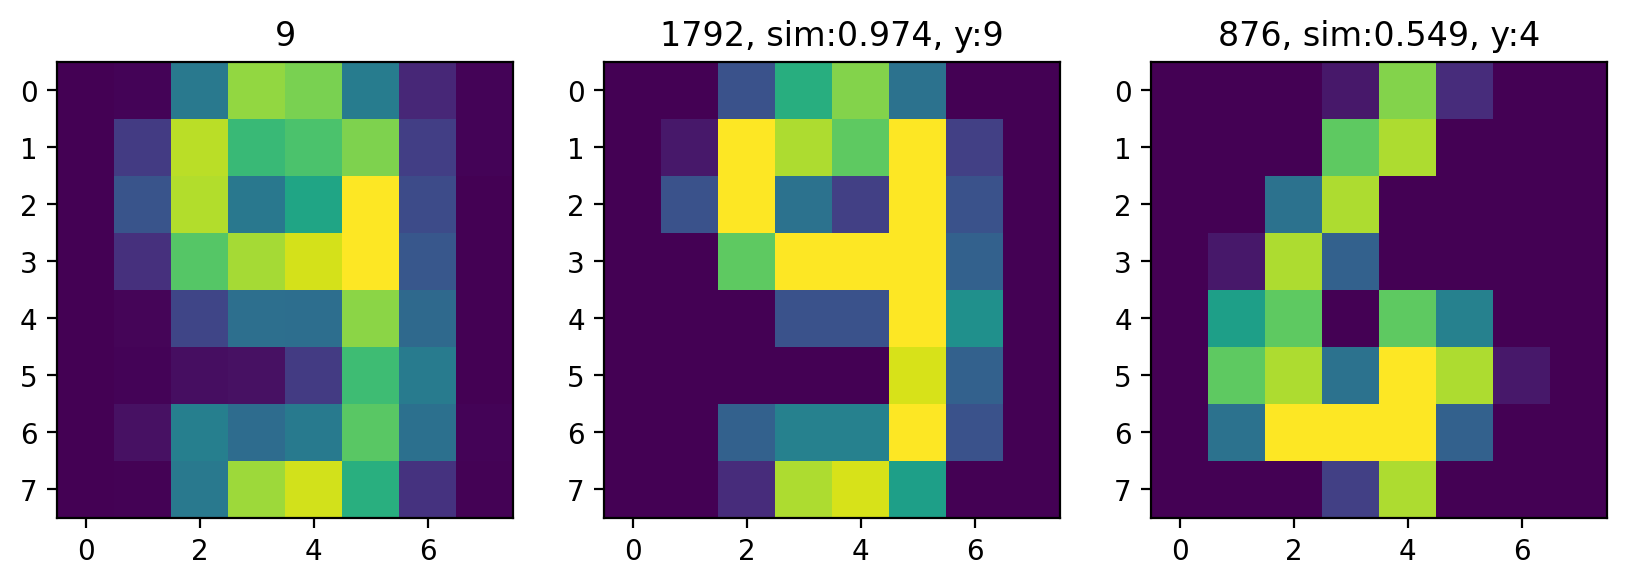

In [ ]:
for i in range(0, 10):

    min_idx = np.argmin(similarities[:,i])
    max_idx = np.argmax(similarities[:,i])

    fig, axs = plt.subplots(1,3,figsize=(10,10))
    
    # reference image
    axs[0].set_title(f"{i}")        
    axs[0].imshow(mean_images[i].reshape(8,8))
    
    # image and data with highest similarity to reference
    axs[1].set_title(f"{max_idx}, sim:{similarities[max_idx, i]:.3f}, y:{digits.target[max_idx]}")
    axs[1].imshow(X[max_idx].reshape(8,8))
    
    # image and data with lowest similarity to reference
    axs[2].set_title(f"{min_idx}, sim:{similarities[min_idx, i]:.3f}, y:{digits.target[min_idx]}")
    axs[2].imshow(X[min_idx].reshape(8,8))

plt.show()

__Be prepared to explain__ what you see and reflect upon it!

# Exercise 3
Split your data set into 70% training data (features and labels), and 30% test data (this will be used for the classifiers below).

In [ ]:
# *****************
# *** Your code ***
# *****************


# Exercise 4: k-NN
Process the data with a k-NN classifier as follows: 

### Exercise 4.1
Set up a ```sklearn.neighbors.KNeighborsClassifier``` as it comes in SciKitLearn with ```n_neighbors = 5, algorithm = 'brute'``` and otherwise default parameters

In [ ]:
# *****************
# *** Your code ***
# *****************




### Exercise 4.1
Prepare the classifier ("fit a model") with your training data, i.e. do something like  

In [ ]:
# *****************
# *** Your code ***
# *****************



(array([[11.66190379, 16.94107435, 18.16590212, 19.31320792, 20.19900988],
        [21.09502311, 21.47091055, 21.61018278, 21.74856317, 21.81742423],
        [18.02775638, 18.1934054 , 19.62141687, 21.16601049, 21.9317122 ],
        ...,
        [20.83266666, 21.70253441, 22.93468988, 24.0208243 , 25.63201124],
        [19.5192213 , 21.09502311, 23.87467277, 24.69817807, 24.8394847 ],
        [26.73948391, 27.62245463, 27.73084925, 27.80287755, 27.92848009]]),
 array([[ 353,  817,  297,  366, 1254],
        [1177,  588,  725,  824,  335],
        [ 376,  791,  801,  165,  896],
        ...,
        [ 148,  248,  242, 1069,  255],
        [ 254,  251,  849,  417,  199],
        [ 183,  248, 1015,  513,  224]]))

### Exercise 4.2
 Apply your classifier to the test data, i.e., get predictions for the test data with 

In [ ]:
# *****************
# *** Your code ***
# *****************


array([4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5, 4,
       8, 8, 4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3,
       4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5,
       0, 9, 8, 9, 8, 4, 1, 7, 7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2,
       6, 3, 3, 7, 3, 3, 4, 6, 6, 6, 4, 9, 1, 5, 0, 9, 6, 2, 8, 3, 0, 0,
       1, 7, 6, 3, 2, 1, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0,
       5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5, 4, 1, 8,
       4, 9, 0, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7,
       8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9,
       8, 4, 1, 7, 7, 3, 5, 1, 0, 0, 2, 2, 7, 9, 2, 0, 1, 2, 6, 3, 3, 7,
       3, 3, 4, 6, 6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 9, 7, 6, 3,
       2, 1, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3, 6, 9,
       6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5, 4, 8, 8, 4, 9, 0, 8,
       9, 8, 0, 1, 2, 3, 4, 5, 6, 7, 1, 9, 0, 1, 2,

Get the nearest neighbors and the corresponding distances in the training set for each test sample by using  

In [ ]:
#Usage <distances, neighbors> = <classifier>.kneighbors( <test_features>) 

# *** Your code ***



Visualize the 5 nearest neighbors for a few test images (see tutorial)!

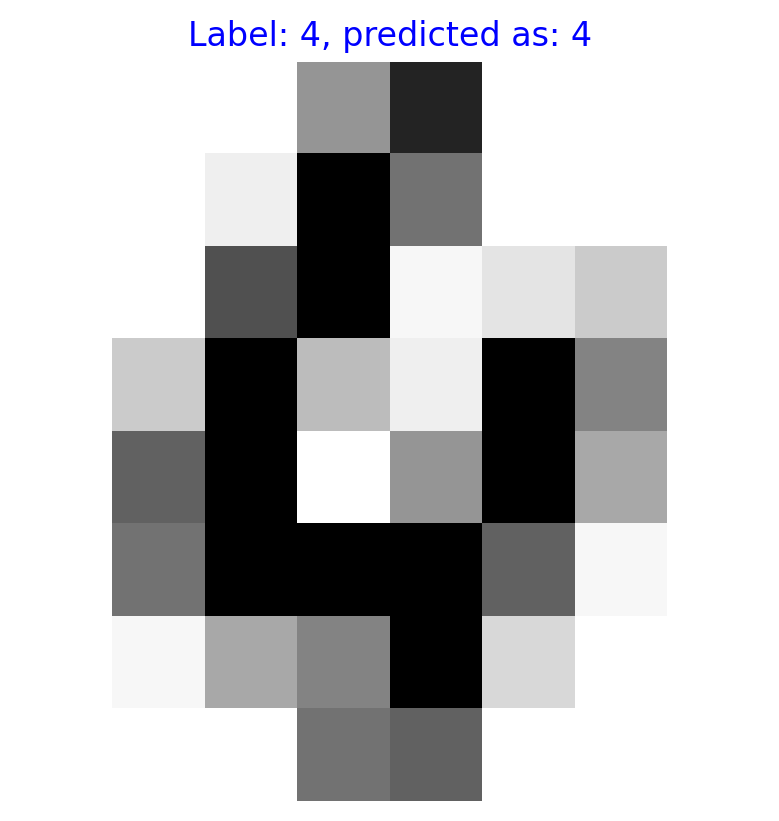

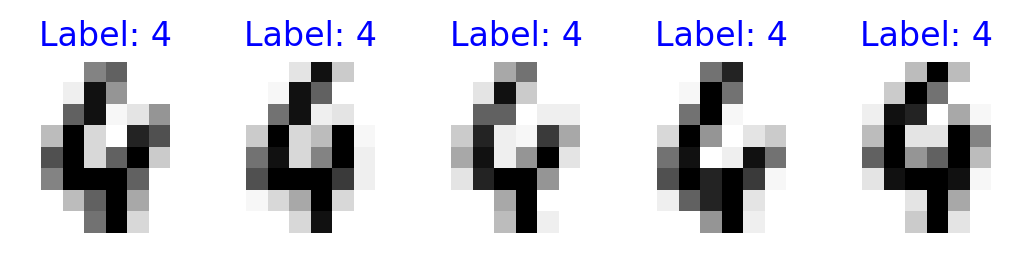

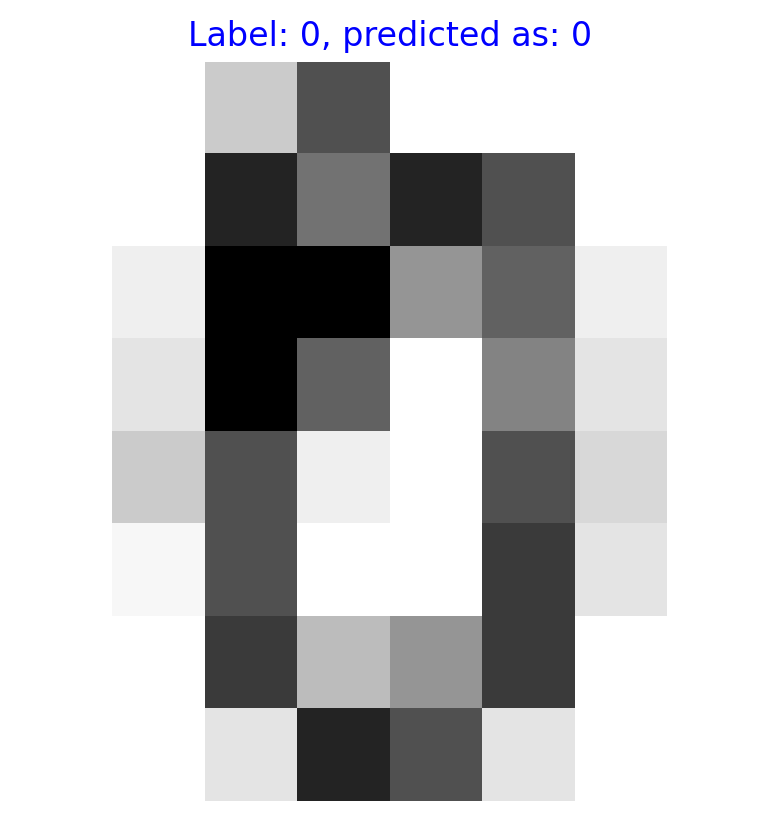

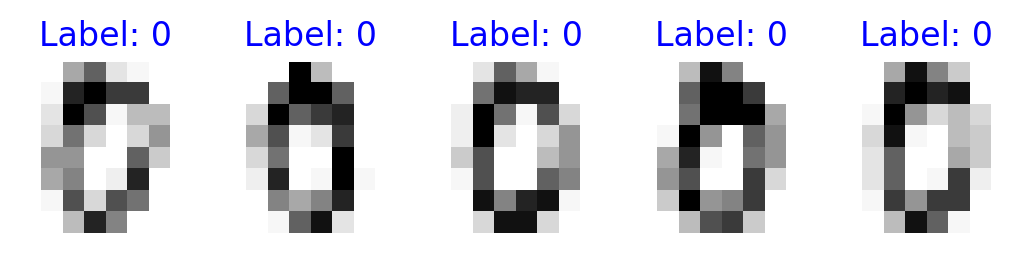

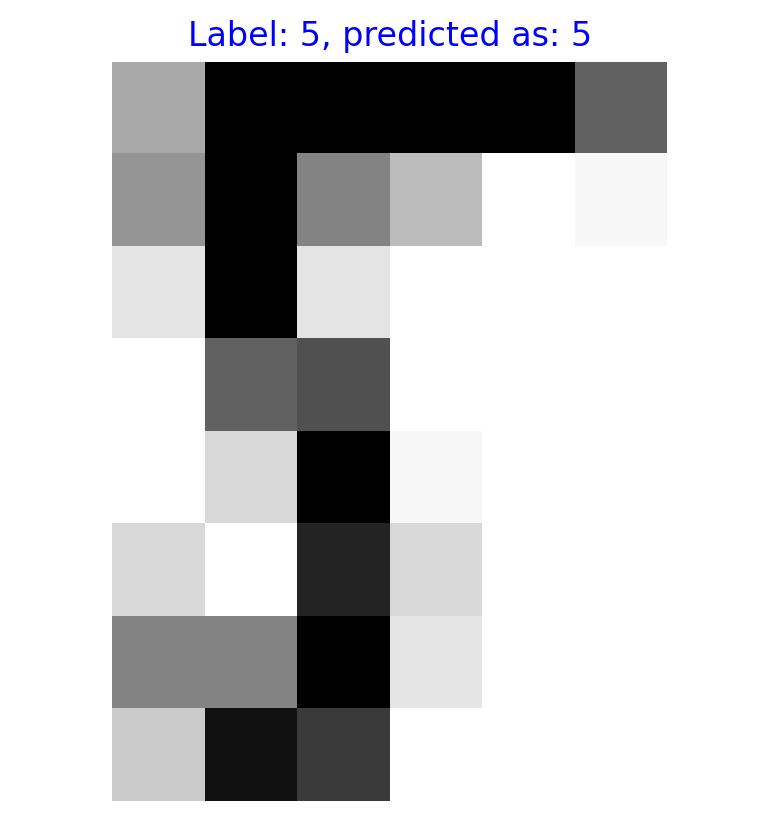

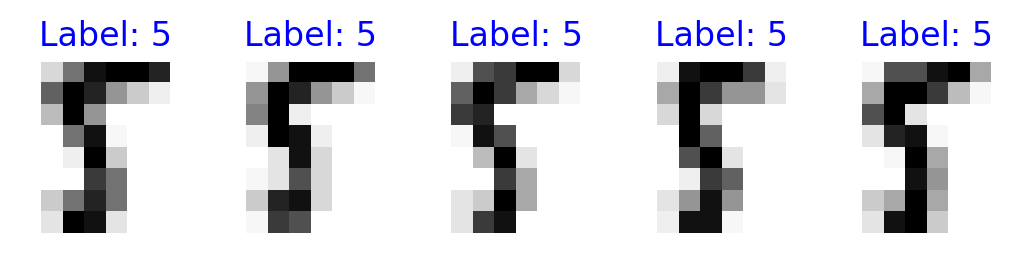

In [ ]:
# *****************
# *** Your code ***
# *****************

        

### Exercise 4.3
Evaluate your classifier with the sklearn.metrics tools classification_report and confusion_matrix:  

In [ ]:
# Usage metrics.classification_report( <test_labels>, <predicted_labels>) 
# *****************
# *** Your code ***
# *****************




and

In [ ]:
# USage metrics.confusion_matrix( <test_labels, <predicted_labels>)
# *****************
# *** Your code ***
# *****************


# Exercise 5: k-Means
Cluster the data with k-Means as follows:

### Exercise 5.1
Set up a k-Means instance (```sklearn.cluster.KMeans```) with ```n_clusters=10```, default parameters otherwise.

In [ ]:
#*** Your code ***


### Exercise 5.2
Apply the clustering approach with

In [ ]:
#<clusters> = <clustering>.fit(<train_features>)
# *** Your code ***


KMeans(n_clusters=10, n_init=100, random_state=42)

### Exercise 5.3
Visualise the found cluster centers (you can get them using <clustering>.cluster_centers_); those are in principle also images, but maybe not as clearly interpretable as you would have hoped for. Compare what you see with the scatter plot you got from UMAP, i.e. find k-Means-clusters (visualised as cluster center images) and corresponding UMAP-plot-clusters (visualised as blobs or scattered dots in the plot) that are clearly distinct from everything else or others that seem to be "all the same" or at least very close.

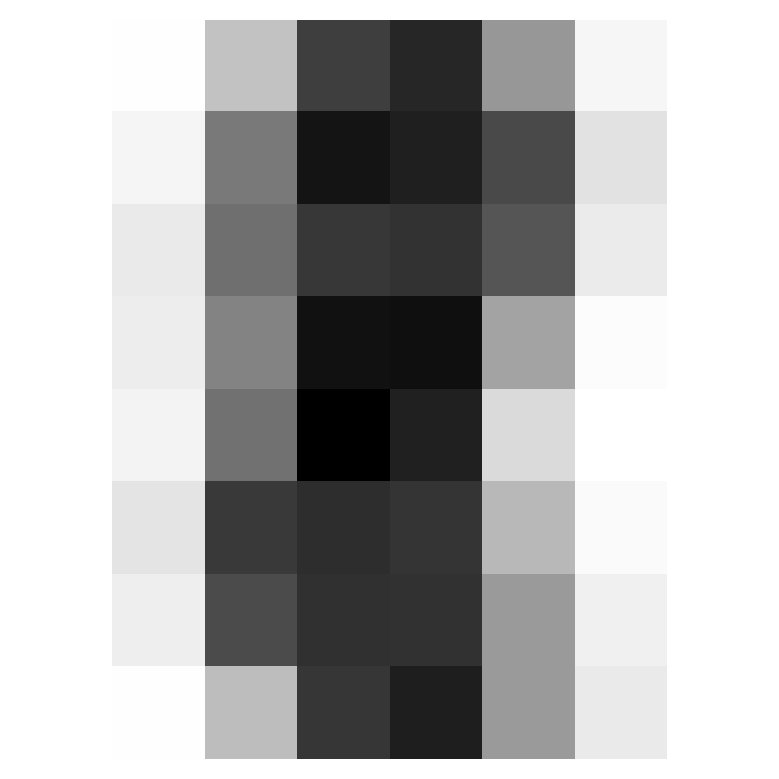

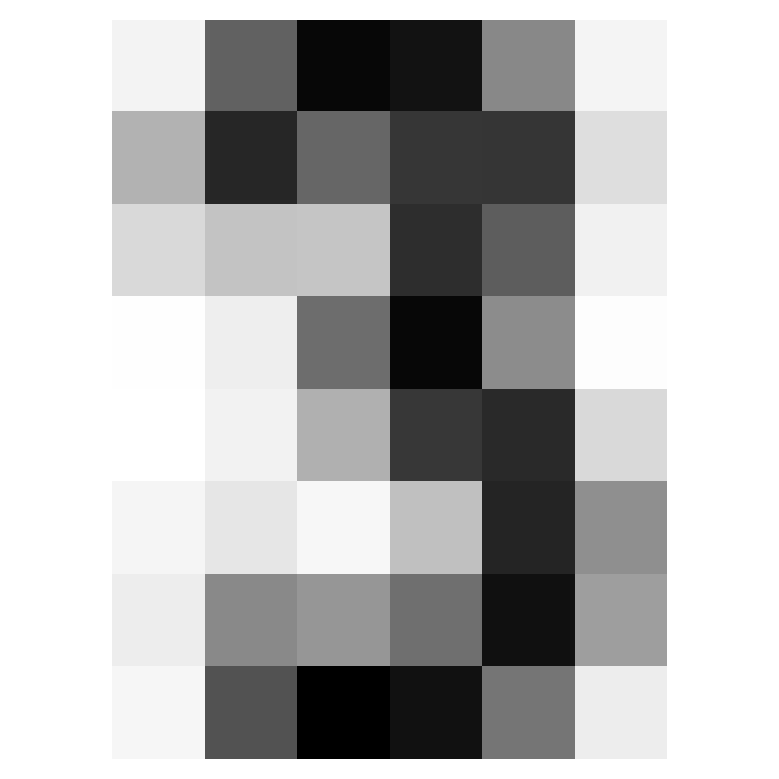

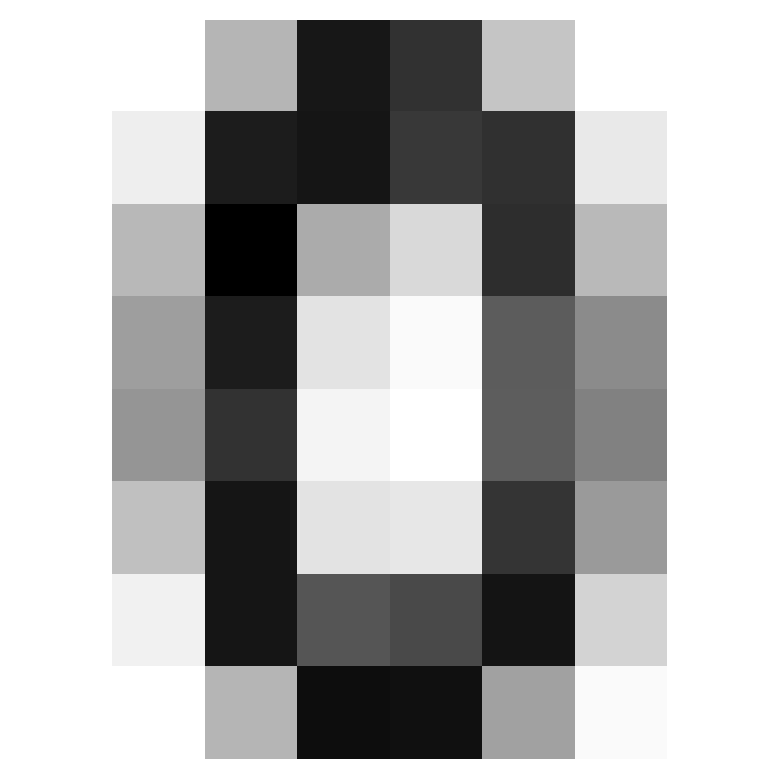

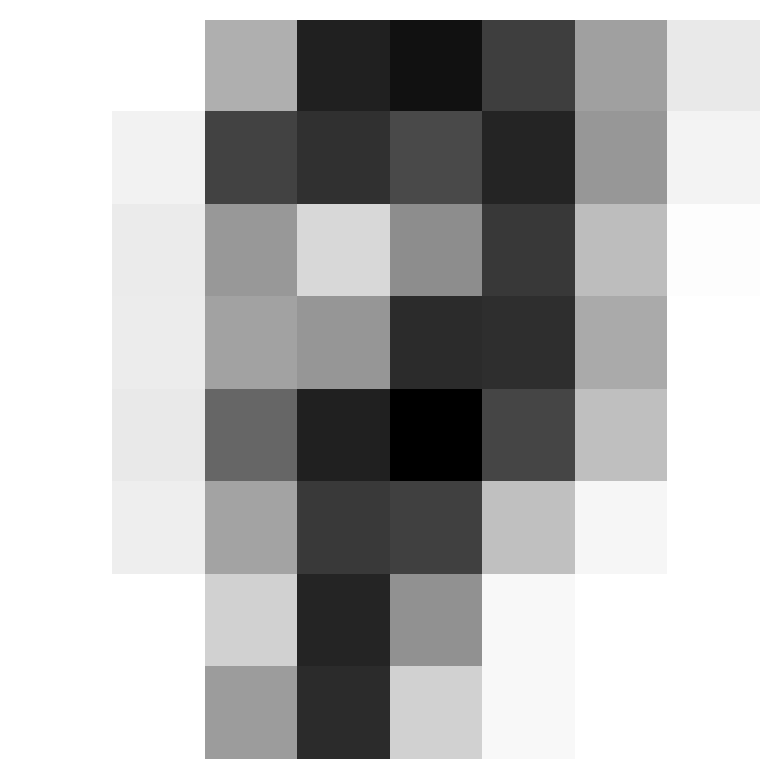

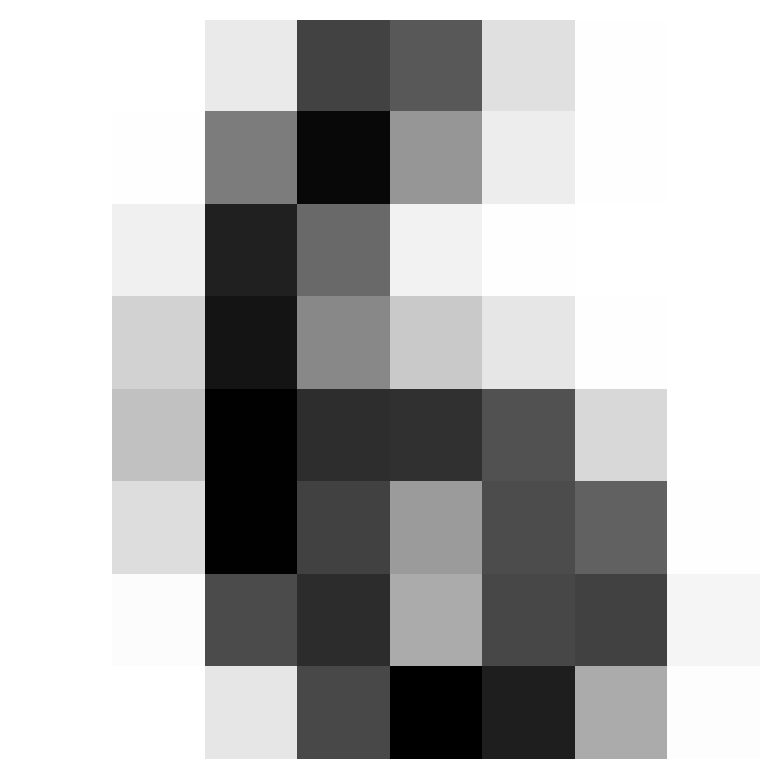

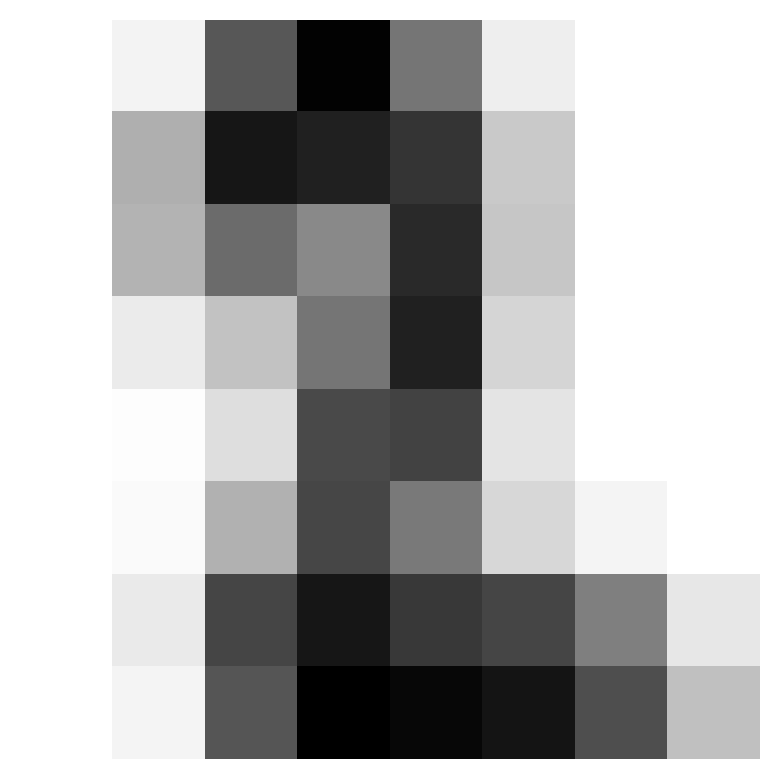

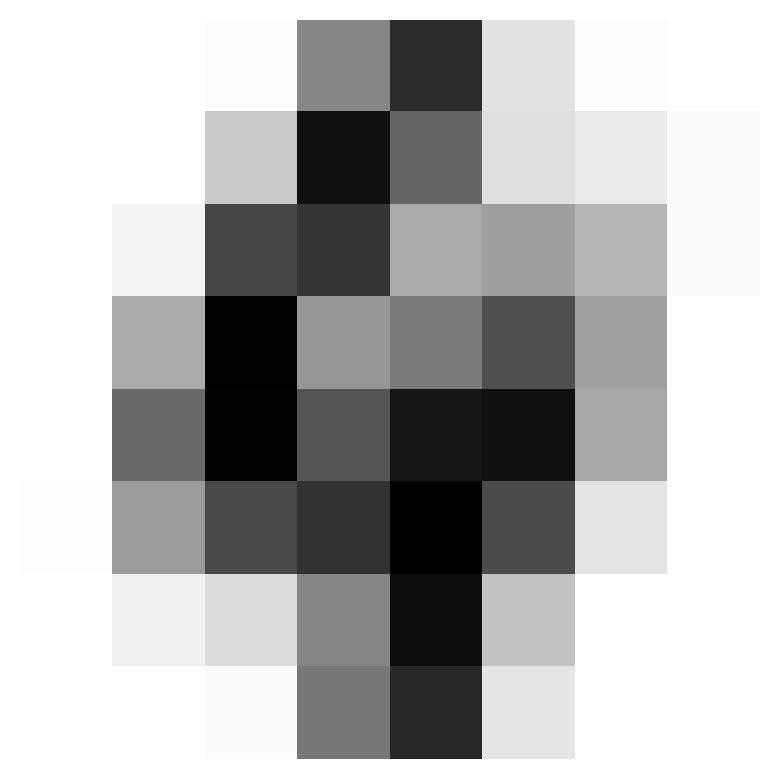

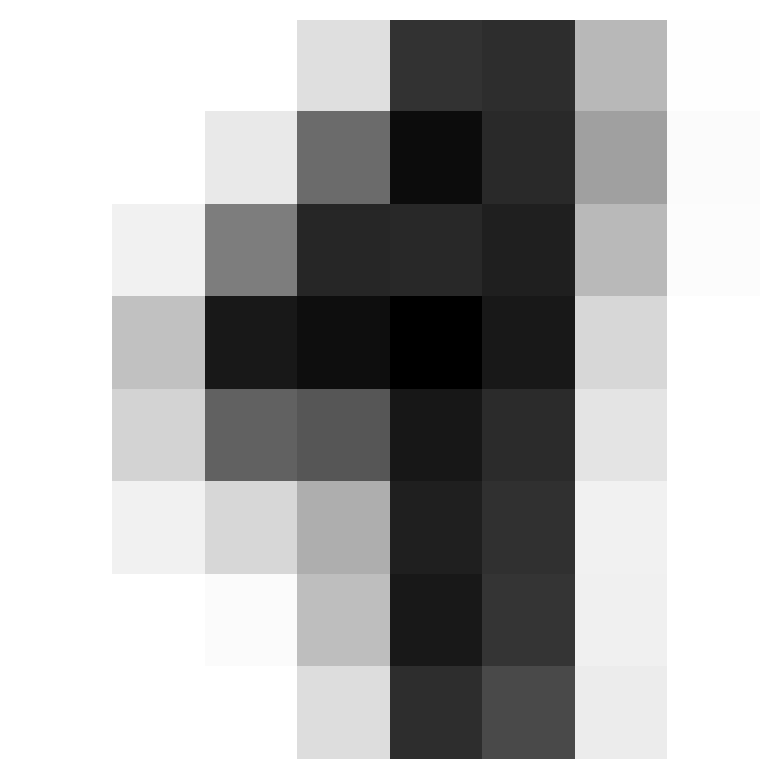

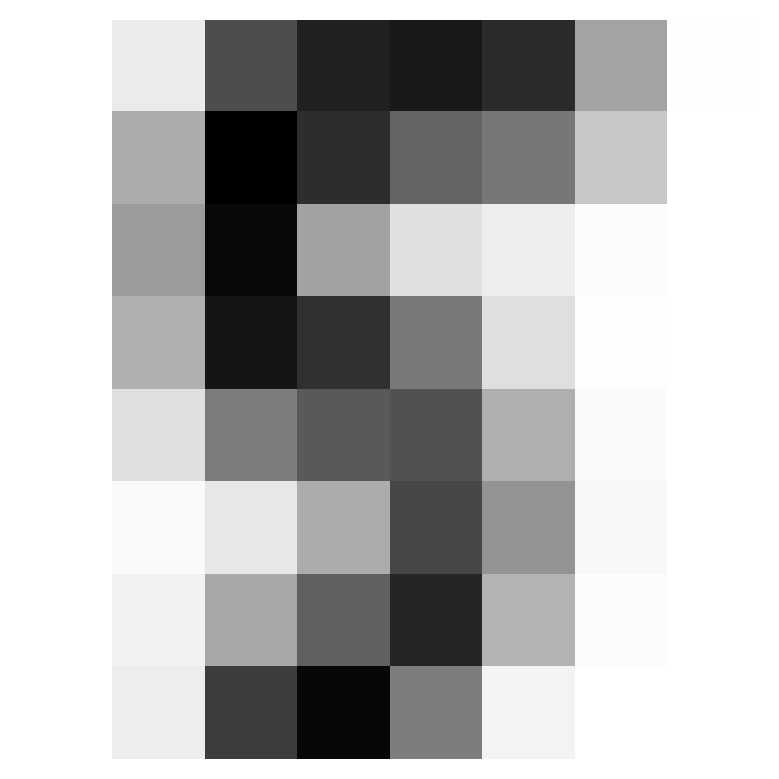

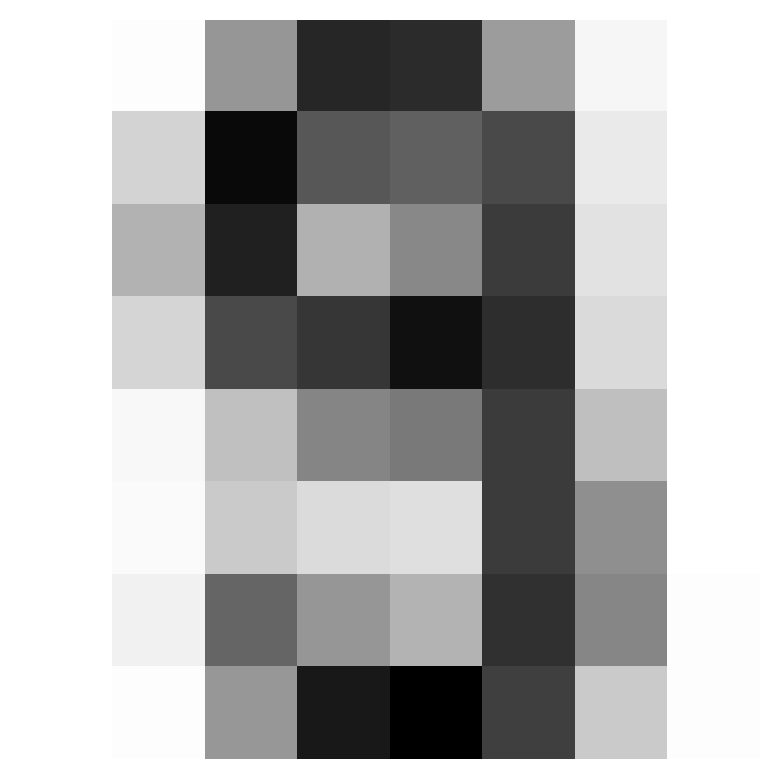

In [ ]:
# *****************
# *** Your code ***
# *****************


### Exercise 5.4
Investigate at least the following evaluation tools in the SciKitLearn documentation:

In [ ]:
metrics.completeness_score( <labels>, <cluster-labels>)
metrics.homogeneity_score( <labels>, <cluster-labels>)

For those to work you should run a prediction step over the training data (into cluster-labels), to have a bit more data to look at. Rough numbers for what those measures should be can be found in the check list below. .

In [ ]:
# *****************
# *** Your code ***
# *****************





For the interested: Try also the following score (the main concept is the mutual information score, the adjusted mutual information score is an improved variant) and give its documentation some thoughts, discuss it with your partner and in the peer review (it should make more sense after the information theory lecture, but there is also some intuition in it, that you can reflect upon)

In [ ]:
# Usage metrics.adjusted_mutual_info_score( <labels>, <cluster-labels>)
# *****************
# *** Your code ***
# *****************


### Exercise 5.5
For each cluster, assign a label by taking the most common label of the training data assigned to the cluster. 


In [ ]:
# *****************
# *** Your code ***
# *****************
# Assign labels to clusters. 



### Exercise 5.6
Use the clustering result to do a prediction for the test data and evaluate the result. It should be quite bad. Think about an explanation for this low quality and find solutions (hint: the search phrase "assigning class label to cluster" in a well known search engine would do just fine). 

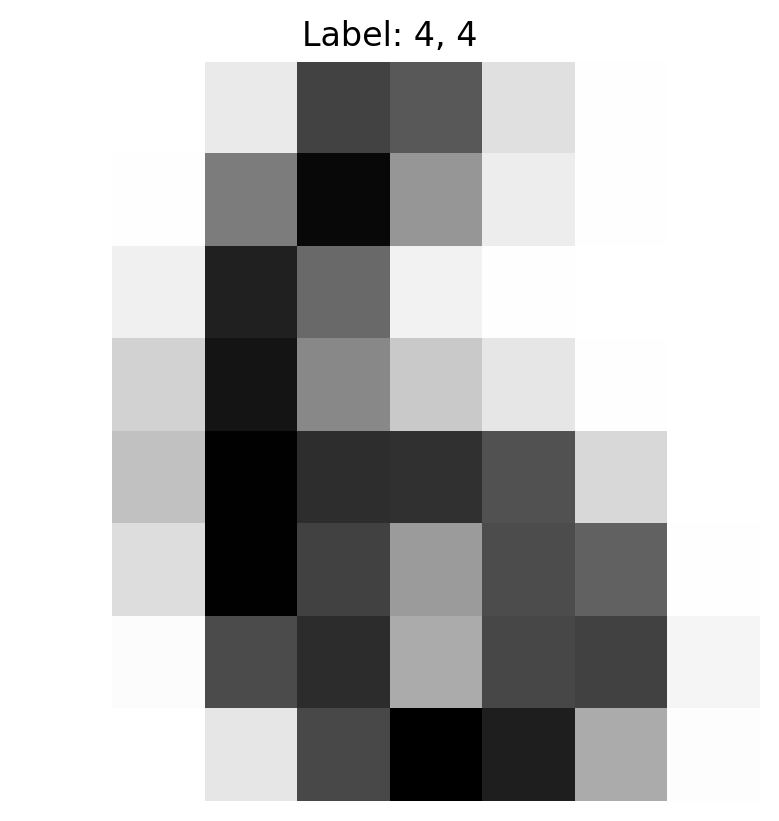

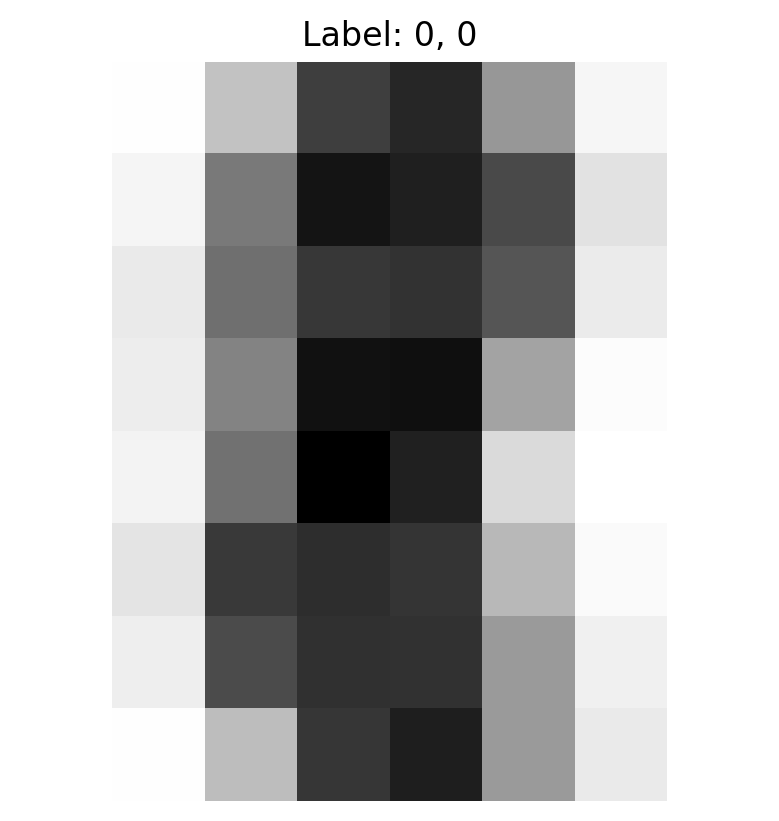

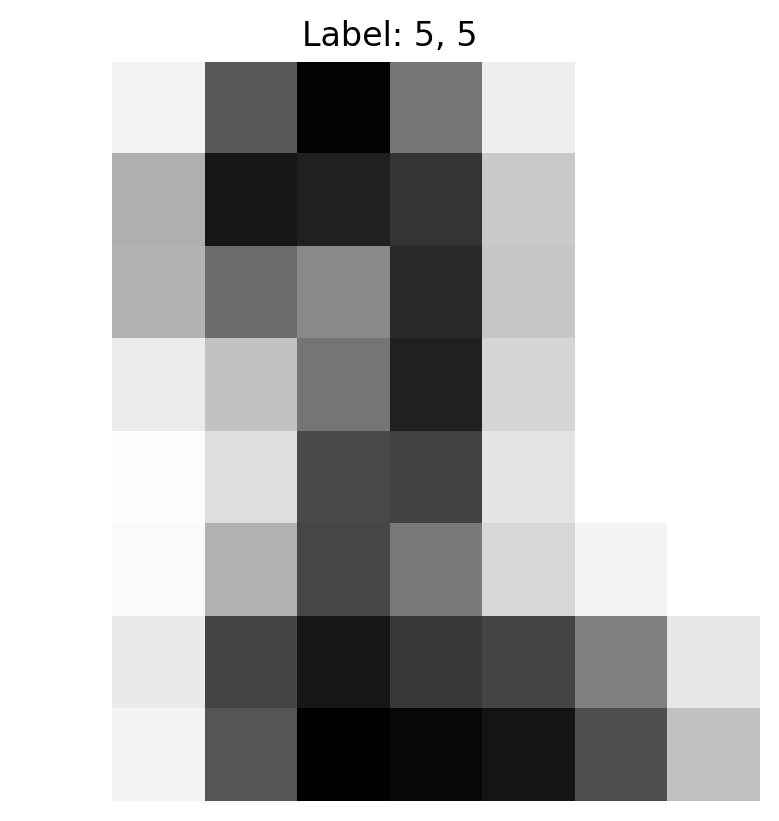

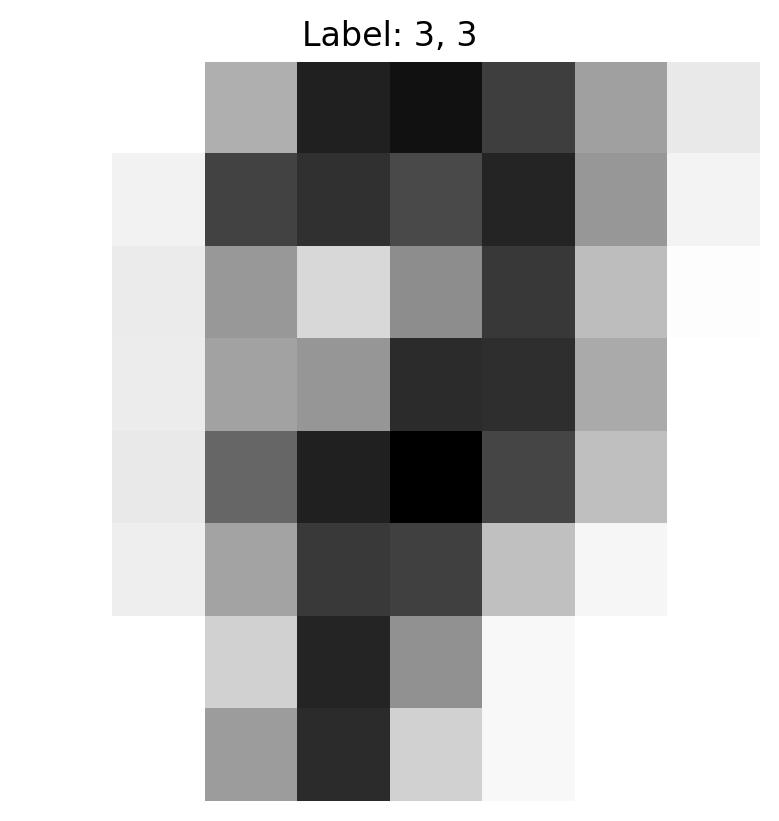

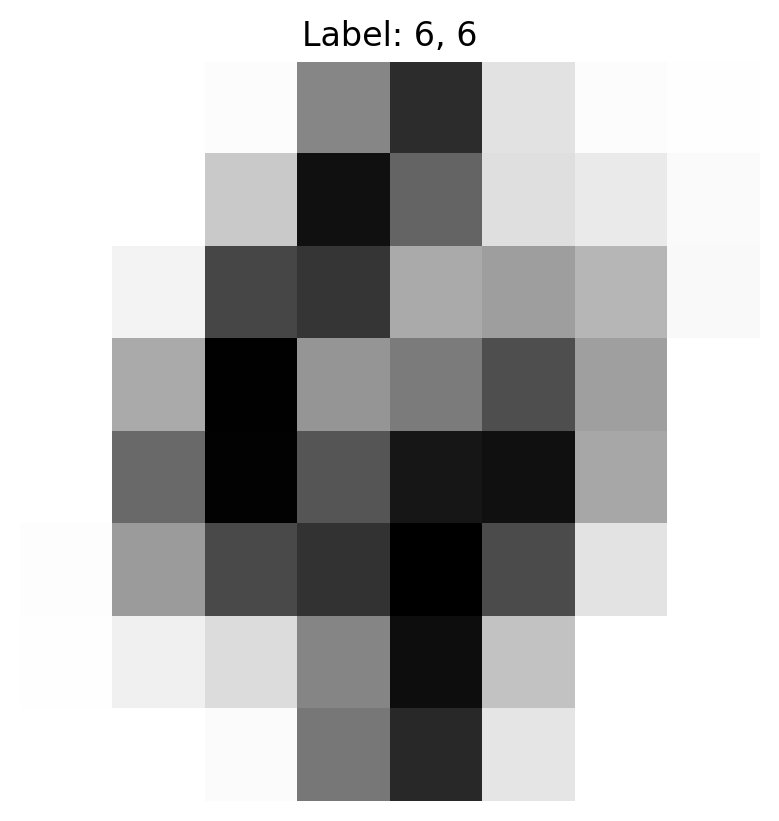

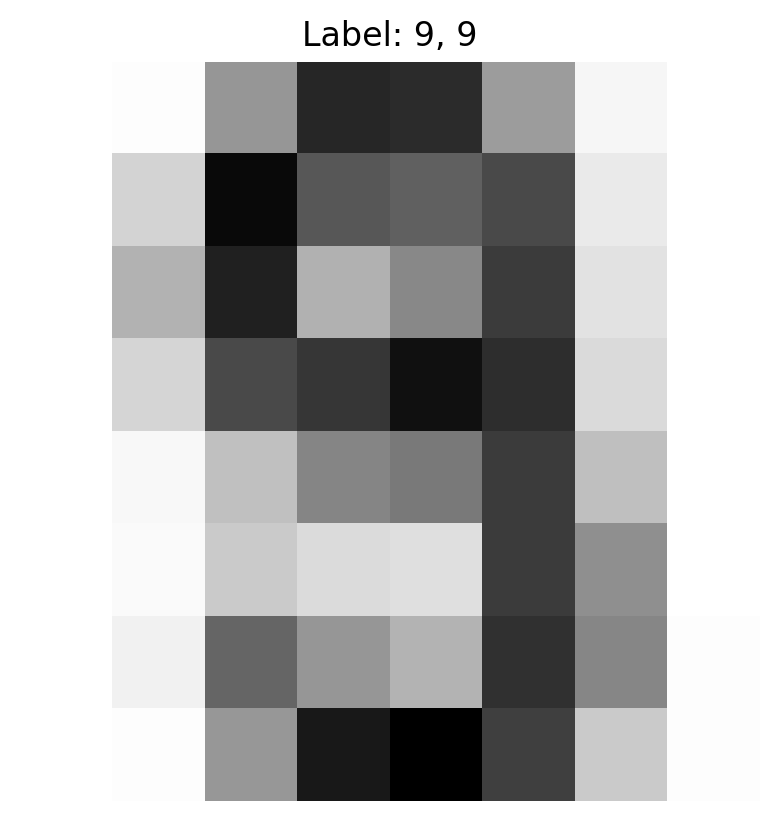

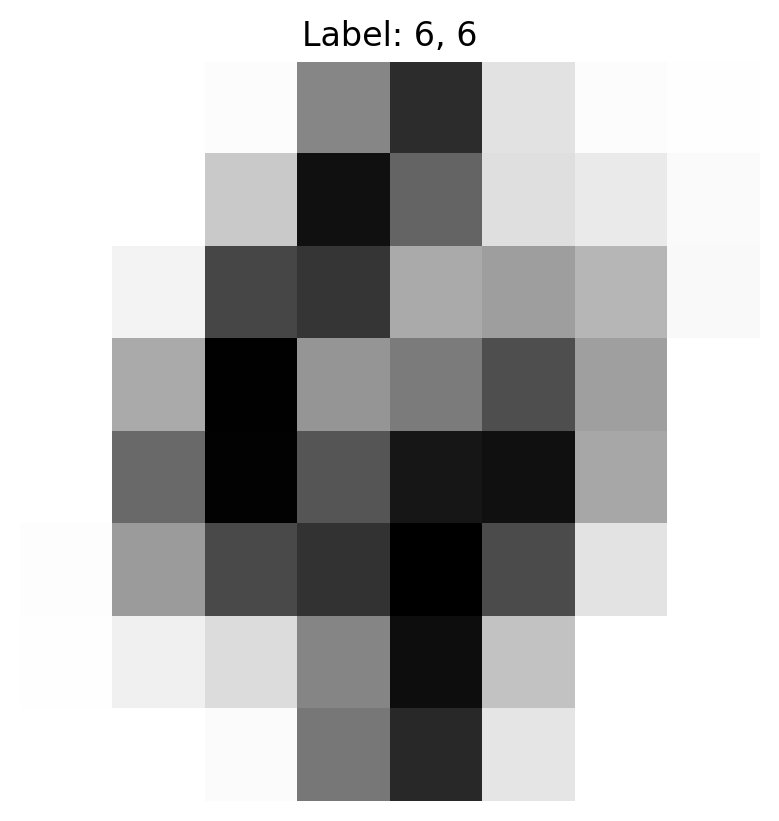

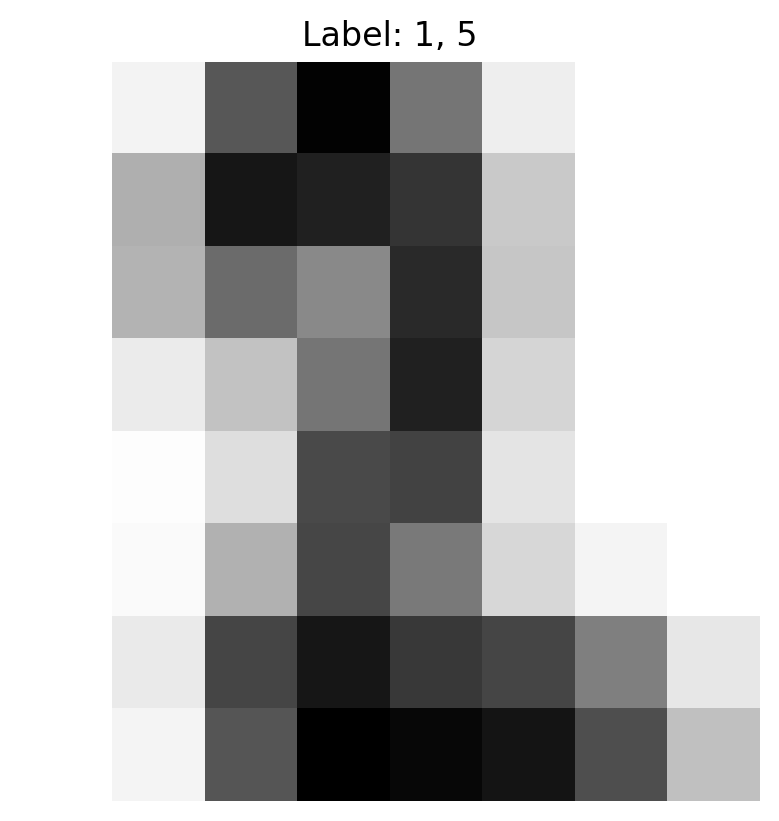

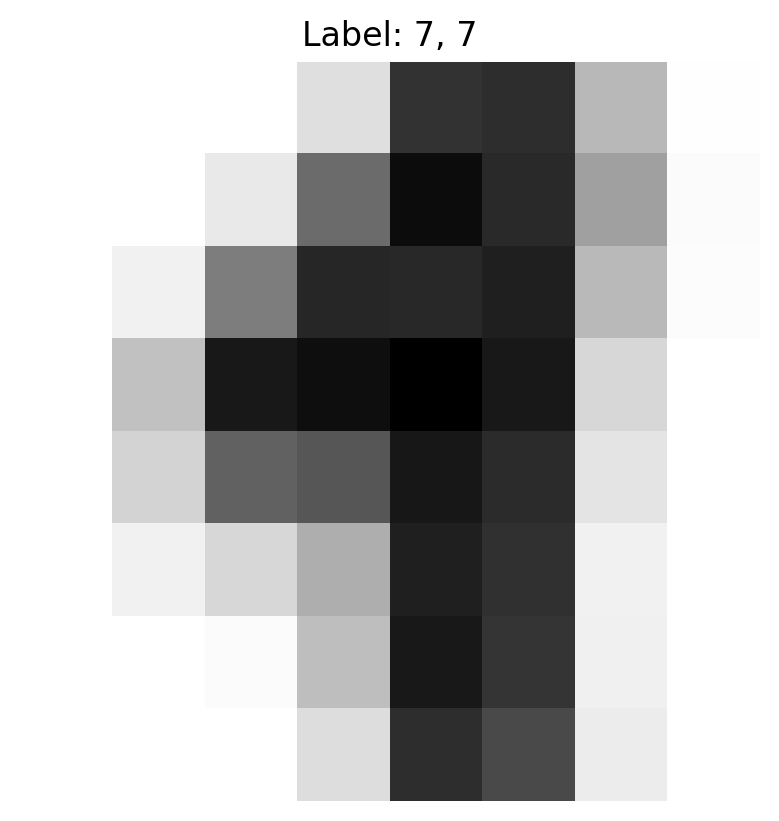

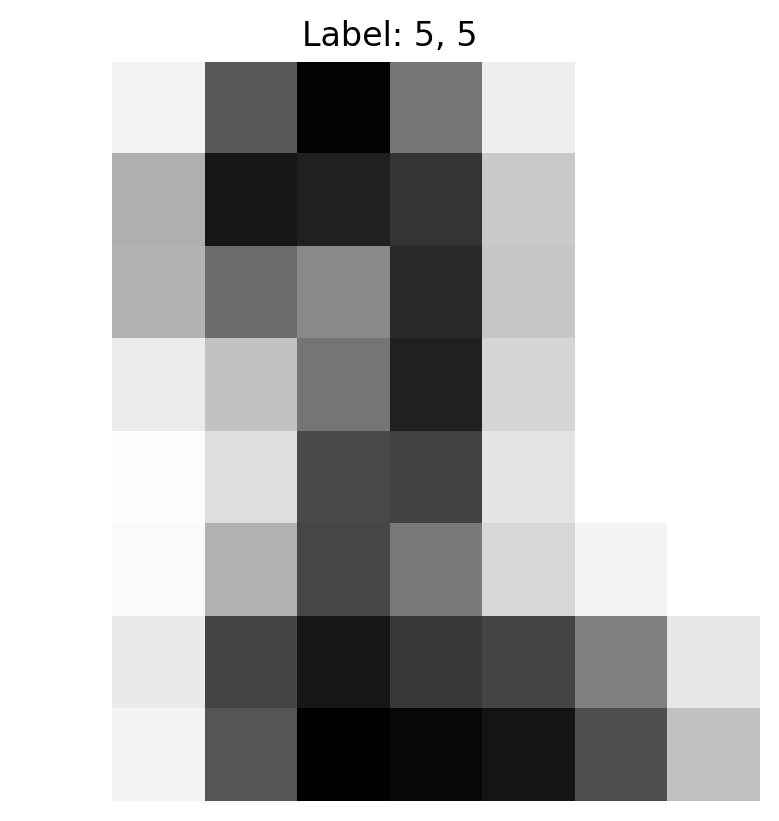

Evaluation report k-Means (test data):
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        53
           1       0.68      0.32      0.44        53
           2       0.98      0.79      0.88        53
           3       0.77      0.77      0.77        53
           4       0.96      0.91      0.94        57
           5       0.82      0.64      0.72        56
           6       0.98      0.96      0.97        54
           7       0.85      0.96      0.90        54
           8       0.44      0.65      0.52        52
           9       0.55      0.75      0.63        55

    accuracy                           0.78       540
   macro avg       0.80      0.77      0.77       540
weighted avg       0.80      0.78      0.78       540


Confusion matrix KM:
[[52  0  0  0  1  0  0  0  0  0]
 [ 0 17  0  0  0  1  0  0 35  0]
 [ 1  0 42  7  0  0  0  0  0  3]
 [ 0  0  0 41  0  2  0  3  6  1]
 [ 1  1  0  0 52  0  0  3  0  0]
 [ 0  0  0  0  

In [ ]:
# *****************
# *** Your code ***
# *****************
# Predict on the test set
